In [4]:
!pip install pandas

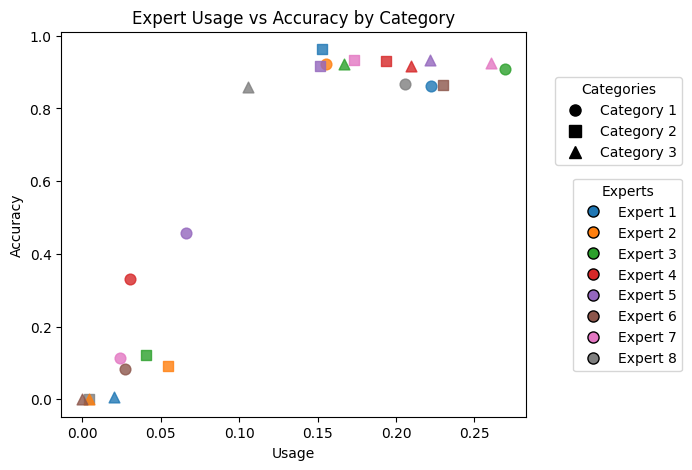

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ---- 1) Put your data in a DataFrame ---------------------------------
# Easiest: copy-paste from Excel as CSV and read with pandas.read_csv.
# Here is a minimal example assuming you already have a CSV:
# df = pd.read_csv("experts_table.csv")

# Or build the DataFrame directly (shortened example – replace with your full table)
data = {
    "Expert":   [1,2,3,4,5,6,7,8, 1,2,3,4,5,6,7,8, 1,2,3,4,5,6,7,8],
    "Category": [1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3],
    "Acc":      [0.8618,0.9212,0.9089,0.3306,0.4561,0.0839,0.1132,0.8669,
                 0.9631,0.0912,0.1214,0.9302,0.9166,0.8642,0.9331,0.0010,
                 0.0071,0.0000,0.9214,0.9163,0.9345,0.0000,0.9244,0.8599],
    "Usage":    [0.222,0.1551,0.2696,0.0304,0.0663,0.0269,0.0242,0.2055,
                 0.1529,0.0543,0.0408,0.1933,0.1513,0.2300,0.1731,0.0043,
                 0.0201,0.0040,0.1667,0.2098,0.2219,0.0000,0.2604,0.1057],
}
df = pd.DataFrame(data)

# ---- 2) Define color per expert & marker per category ----------------
experts = sorted(df["Expert"].unique())      # [1..8]
categories = sorted(df["Category"].unique()) # [1,2,3]

# Use a matplotlib categorical colormap for experts
cmap = plt.get_cmap("tab10")
expert_to_color = {exp: cmap(i % 10) for i, exp in enumerate(experts)}

# Use different marker shapes to represent categories ("textures")
markers = ["o", "s", "^"]  # circle, square, triangle
cat_to_marker = {cat: markers[i % len(markers)] for i, cat in enumerate(categories)}

# ---- 3) Make the scatter plot ----------------------------------------
plt.figure(figsize=(6, 5))

for _, row in df.iterrows():
    expert = row["Expert"]
    cat = row["Category"]
    plt.scatter(
        row["Usage"],
        row["Acc"],
        color=expert_to_color[expert],
        marker=cat_to_marker[cat],
        s=60,
        alpha=0.8,
    )

plt.xlabel("Usage")
plt.ylabel("Accuracy")
plt.title("Expert Usage vs Accuracy by Category")

# ---- 4) Separate legends: one for experts (colors), one for categories (markers)
expert_handles = [
    Line2D([0], [0], marker="o", color="none",
           markerfacecolor=expert_to_color[exp], markersize=8,
           label=f"Expert {exp}")
    for exp in experts
]

category_handles = [
    Line2D([0], [0], marker=cat_to_marker[cat], color="black",
           linestyle="None", markersize=8, label=f"Category {cat}")
    for cat in categories
]

legend1 = plt.legend(handles=expert_handles, title="Experts",
                     loc="lower right", bbox_to_anchor=(1.35, 0.1))
legend2 = plt.legend(handles=category_handles, title="Categories",
                     loc="upper right", bbox_to_anchor=(1.35, 0.9))
plt.gca().add_artist(legend1)  # so the first legend isn't replaced

#"plt.tight_layout()
plt.show()


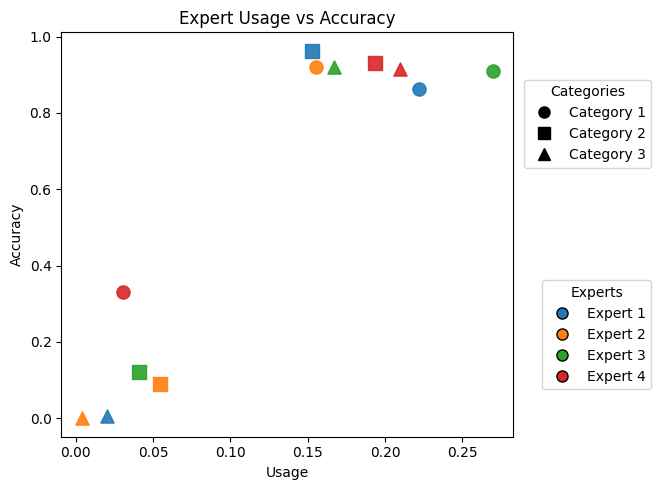

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# -------------------------
# Your dataset
# -------------------------
data = {
    "Expert":   [1,2,3,4, 1,2,3,4, 1,2,3,4],
    "Category": [1,1,1,1, 2,2,2,2, 3,3,3,3],
    "Acc":      [0.8618,0.9212,0.9089,0.3306,
                 0.9631,0.0912,0.1214,0.9302,
                 0.0071,0.0,    0.9214,0.9163],
    "Usage":    [0.222,0.1551,0.2696,0.0304,
                 0.1529,0.0543,0.0408,0.1933,
                 0.0201,0.004,  0.1667,0.2098]
}
df = pd.DataFrame(data)

experts = sorted(df["Expert"].unique())      # [1,2,3,4]
categories = sorted(df["Category"].unique()) # [1,2,3]

# -------------------------
# Colors for experts
# -------------------------
cmap = plt.get_cmap("tab10")
expert_to_color = {exp: cmap(i) for i, exp in enumerate(experts)}

# -------------------------
# Marker shapes for categories
# -------------------------
markers = ["o", "s", "^"]  # circle, square, triangle
cat_to_marker = {cat: markers[i] for i, cat in enumerate(categories)}

# -------------------------
# Scatterplot
# -------------------------
plt.figure(figsize=(7, 5))

for _, row in df.iterrows():
    plt.scatter(
        row["Usage"],
        row["Acc"],
        color=expert_to_color[row["Expert"]],
        marker=cat_to_marker[row["Category"]],
        s=90,
        alpha=0.9
    )

plt.xlabel("Usage")
plt.ylabel("Accuracy")
plt.title("Expert Usage vs Accuracy")

# -------------------------
# Legends
# -------------------------
expert_handles = [
    Line2D([0], [0], marker="o", color="none",
           markerfacecolor=expert_to_color[exp], markersize=8,
           label=f"Expert {exp}")
    for exp in experts
]

category_handles = [
    Line2D([0], [0], marker=cat_to_marker[cat], color="black",
           markersize=8, linestyle="None",
           label=f"Category {cat}")
    for cat in categories
]

legend1 = plt.legend(handles=expert_handles, title="Experts",
                     loc="lower right", bbox_to_anchor=(1.32, 0.1))
legend2 = plt.legend(handles=category_handles, title="Categories",
                     loc="upper right", bbox_to_anchor=(1.32, 0.9))
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()
